#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#### Loading Data

In [2]:
data = pd.read_csv('sales.csv')
print(data.shape)
data.head()

(640840, 10)


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


#### Checking Info and Dtypes

In [3]:
data.info

<bound method DataFrame.info of         Unnamed: 0  store_ID  day_of_week        date  nb_customers_on_day  \
0           425390       366            4  2013-04-18                  517   
1           291687       394            6  2015-04-11                  694   
2           411278       807            4  2013-08-29                  970   
3           664714       802            2  2013-05-28                  473   
4           540835       726            4  2013-10-10                 1068   
...            ...       ...          ...         ...                  ...   
640835      359783       409            6  2013-10-26                  483   
640836      152315        97            1  2014-04-14                  987   
640837      117952       987            1  2014-07-07                  925   
640838      435829      1084            4  2014-06-12                  725   
640839      305711       695            7  2015-05-03                    0   

        open  promotion state_h

In [4]:
data.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

#### Checking Nans & Duplicates

In [5]:
data.isna().sum().sum()

0

In [6]:
data.duplicated().sum()

0

#### Checking values inside columns 

In [7]:
data['Unnamed: 0'].value_counts()

425390    1
470563    1
581093    1
449511    1
671617    1
         ..
359805    1
159087    1
52456     1
46534     1
305711    1
Name: Unnamed: 0, Length: 640840, dtype: int64

In [8]:
data = data.drop(['Unnamed: 0'], axis = 1)

We can drop this column as it doenst give any relevant info. There is one for each row. 

In [9]:
data['store_ID'].value_counts()

1045    645
309     636
754     635
432     634
286     634
       ... 
1004    448
287     448
1065    445
81      438
542     436
Name: store_ID, Length: 1115, dtype: int64

These are the ids of the different stores 

In [10]:
data['day_of_week'].value_counts()

5    92138
4    91972
2    91686
3    91651
6    91347
7    91075
1    90971
Name: day_of_week, dtype: int64

Days of the week encoded as numerical from 1 (monday) to 7 (sunday)

In [11]:
data['date'].value_counts()

2015-05-10    756
2014-05-23    746
2014-02-20    745
2014-05-22    741
2014-03-21    740
             ... 
2014-10-20    562
2014-09-11    561
2014-12-09    561
2014-09-27    559
2014-08-17    558
Name: date, Length: 942, dtype: int64

In [12]:
data['date'] = pd.to_datetime(data['date'])

Date as a string, we convert this to date format 

In [13]:
data['month_of_year'] =  data['date'].dt.month

Creating a new column containing the month info.

In [14]:
data = data.drop(['date'], axis = 1)

We can drop the date column as we have the info that we want from it in day of week and month of year

In [15]:
data['nb_customers_on_day'].value_counts()

0       108854
560       1539
517       1507
571       1493
528       1492
         ...  
3969         1
4496         1
4578         1
4925         1
4003         1
Name: nb_customers_on_day, Length: 3886, dtype: int64

Number of customers received per day 

In [16]:
data['open'].value_counts()

1    532016
0    108824
Name: open, dtype: int64

Boolean indicating 0 shop closed 1 shop opened

In [17]:
data['promotion'].value_counts()

0    396220
1    244620
Name: promotion, dtype: int64

Boolean indicating 0 No promo 1 promo Active

In [18]:
data['state_holiday'].value_counts()

0    621160
a     12842
b      4214
c      2624
Name: state_holiday, dtype: int64

Grouping values a,b & c as 1. They all mean Holidays

In [19]:
data['state_holiday'] = np.where(data.state_holiday.isin(['a','b','c']),'1', data.state_holiday)
data['state_holiday'].value_counts()

0    621160
1     19680
Name: state_holiday, dtype: int64

Boolean indicating 0 No Holiday 1 Holiday On

In [20]:
data['state_holiday'] = data['state_holiday'].astype('int64')

Fixing dtypes as int64 

In [21]:
data['school_holiday'].value_counts()

0    526468
1    114372
Name: school_holiday, dtype: int64

In [22]:
data['school_holiday'] = data['school_holiday'].replace({0:1, 1:0})
data['school_holiday'].value_counts()

1    526468
0    114372
Name: school_holiday, dtype: int64

Boolean indicating 0 No Holiday 1 Holiday On

In [23]:
data['sales'].value_counts()

0        108855
5674        146
6049        134
5449        130
5723        128
          ...  
17856         1
24020         1
20922         1
16375         1
16737         1
Name: sales, Length: 20129, dtype: int64

In [24]:
data['sales'] = data['sales'].astype('float64')

Fixing dtypes as float64 because sales can be decimals 

#### Re Checking Dtypes

In [25]:
data

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,month_of_year
0,366,4,517,1,0,0,1,4422.0,4
1,394,6,694,1,0,0,1,8297.0,4
2,807,4,970,1,1,0,1,9729.0,8
3,802,2,473,1,1,0,1,6513.0,5
4,726,4,1068,1,1,0,1,10882.0,10
...,...,...,...,...,...,...,...,...,...
640835,409,6,483,1,0,0,1,4553.0,10
640836,97,1,987,1,1,0,1,12307.0,4
640837,987,1,925,1,0,0,1,6800.0,7
640838,1084,4,725,1,0,0,1,5344.0,6


In [26]:
data.dtypes

store_ID                 int64
day_of_week              int64
nb_customers_on_day      int64
open                     int64
promotion                int64
state_holiday            int64
school_holiday           int64
sales                  float64
month_of_year            int64
dtype: object

#### Group total sales and nº of custtomeers by store ID & Day  of the week 

In [44]:
data_grp_ID = data.groupby(['store_ID', 'day_of_week']).agg({'sales' : sum, 'nb_customers_on_day': sum})
data_grp_ID.sort_values(by = ['sales'], ascending= False)

sales  nb_customers_on_day
store_ID day_of_week                                
262      7            2472935.0               378635
817      1            1999023.0               275256
         4            1954055.0               284220
513      1            1948643.0               215507
817      2            1919305.0               273103
...                         ...                  ...
575      7                  0.0                    0
576      7                  0.0                    0
577      7                  0.0                    0
579      7                  0.0                    0
1115     7                  0.0                    0

[7805 rows x 2 columns]

#### Correlation Matrix

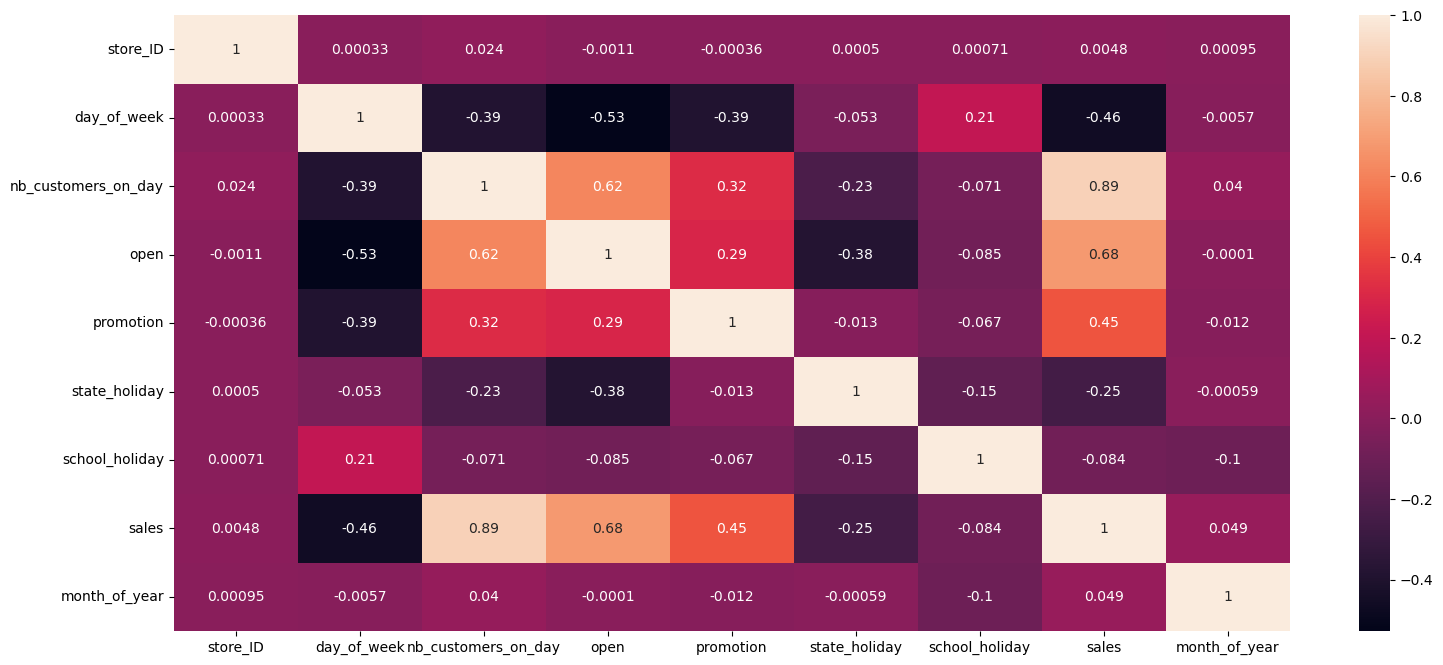

In [27]:
corr_matrix=data.corr()  
fig, ax = plt.subplots(figsize=(18, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

#### X/y split

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGBR
from lightgbm import LGBMRegressor as LGBMR

# Separate the features from the labels

y = data['sales']
X = data.drop(['sales'], axis=1)

print(f'y: {y.shape}')
print(f'X: {X.shape}')

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1224)

# Standardizing data - transform train and test same time all num variables. 

transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

# Linear regression

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

y_pred_lm=lm.predict(X_test)

# KNN Regression

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred_knn=knn.predict(X_test)

# MLP Regression

mlpr = MLPRegressor()
mlpr.fit(X_train, y_train)

y_pred_mlpr=mlpr.predict(X_test)

# SGD Regression

sgdr = SGDRegressor()
sgdr.fit(X_train, y_train)

y_pred_sgdr=sgdr.predict(X_test)

# Lasso L1

lasso=Lasso()
lasso.fit(X_train, y_train)

y_pred_lasso=lasso.predict(X_test)

# Ridge L2

ridge=Ridge()
ridge.fit(X_train, y_train)

y_pred_ridge=ridge.predict(X_test)

# ElasticNet L1+L2

elastic=ElasticNet()
elastic.fit(X_train, y_train)

y_pred_elastic=elastic.predict(X_test)

# Random forest regressor

rfr=RFR()
rfr.fit(X_train, y_train)

y_pred_rfr=rfr.predict(X_test)

# XGB regressor

xgbr=XGBR()
xgbr.fit(X_train, y_train)

y_pred_xgbr=xgbr.predict(X_test)

# LGBM regressor

lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)

y_pred_lgbmr=lgbmr.predict(X_test)

# Model validation

models=[lm, knn, mlpr, sgdr, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names=['lm', 'knn', 'mlpr', 'sgdr', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_lm, y_pred_knn, y_pred_mlpr, y_pred_sgdr, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]

for i in range(len(models)):
    print('=====================================')
    # R2 validation
    train_score=models[i].score(X_train, y_train)
    test_score=models[i].score(X_test, y_test)
    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))
    
    predictions = models[i].predict(X_train)
    
    # MSE validation
    train_mse=mean_squared_error(predictions, y_train)
    test_mse=mean_squared_error(preds[i], y_test)
    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

    # RMSE validation
    train_rmse=mean_squared_error(predictions, y_train)**0.5
    test_rmse=mean_squared_error(preds[i], y_test)**0.5
    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))

    # MAE validation
    train_mae=mean_absolute_error(predictions, y_train)
    test_mae=mean_absolute_error(preds[i], y_test)
    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

C:\Users\ChristianGardel\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


y: (640840,)
X: (640840, 8)


C:\Users\ChristianGardel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ChristianGardel\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Model: lm, train R2: 0.8535820940779035 -- test R2: 0.8537765143891629
Model: lm, train MSE: 2169294.889633077 -- test MSE: 2178846.8090142333
Model: lm, train RMSE: 1472.852636767534 -- test RMSE: 1476.091734620255
Model: lm, train MAE: 985.4808763243284 -- test MAE: 985.3518718026843
Model: knn, train R2: 0.932621332732801 -- test R2: 0.8957000732949492
Model: knn, train MSE: 998267.2382351286 -- test MSE: 1554152.272683041
Model: knn, train RMSE: 999.1332434841354 -- test RMSE: 1246.656437308628
Model: knn, train MAE: 620.6125905062106 -- test MAE: 776.979022845016
Model: mlpr, train R2: 0.8777163645545866 -- test R2: 0.8776260568651333
Model: mlpr, train MSE: 1811726.9454640981 -- test MSE: 1823469.5636754287
Model: mlpr, train RMSE: 1346.0040659166295 -- test RMSE: 1350.359049910589
Model: mlpr, train MAE: 893.90640676132 -- test MAE: 895.2749507685995
Model: sgdr, train R2: -4.7655781030179504e+19 -- test R2: -4.775390587372723e+19
Model: sgdr, train MSE: 7.060573746031151e+26 --

In [72]:
validation = pd.read_csv('validation_for_students.csv')
print(validation.shape)
validation.head()

(71205, 9)


,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0


In [73]:
def standardize_header(dataframe):
    dataframe.columns = [c.lower().replace(' ', '_') for c in dataframe.columns]

standardize_header(validation)

In [74]:
validation

,true_index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0
...,...,...,...,...,...,...,...,...,...
71200,712004,217,2,2015-01-13,633,1,1,0,0
71201,712018,604,3,2014-04-30,743,1,1,0,0
71202,712020,1021,5,2014-07-18,1852,1,1,0,1
71203,712023,28,3,2014-08-27,0,0,0,0,1


In [75]:
def clean_school_holiday(x):
    if x == 0:
        return x
    else:
        return 1

data['school_holiday'] = list(map(clean_school_holiday, data['school_holiday']))
data['school_holiday'].value_counts()

1    526468
0    114372
Name: school_holiday, dtype: int64

In [76]:
data['state_holiday'].value_counts()

1    640840
Name: state_holiday, dtype: int64

In [68]:
data['state_holiday'] = np.where(data.state_holiday.isin(['a','b','c']),'1', data.state_holiday)
data['state_holiday'].value_counts()

1    640840
Name: state_holiday, dtype: int64

In [69]:
validation = validation.drop(['date'], axis = 1)

In [70]:
validation['sales_pred'] = (lm.predict(validation))

C:\Users\ChristianGardel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- store_id
- true_index
Feature names seen at fit time, yet now missing:
- month_of_year
- store_ID

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'c'